In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/self-driving-cars/labels_train.csv
/kaggle/input/self-driving-cars/labels_trainval.csv
/kaggle/input/self-driving-cars/labels_val.csv
/kaggle/input/self-driving-cars/images/1479498457448232030.jpg
/kaggle/input/self-driving-cars/images/1478020894712588023.jpg
/kaggle/input/self-driving-cars/images/1479502069714972898.jpg
/kaggle/input/self-driving-cars/images/1478899347777707565.jpg
/kaggle/input/self-driving-cars/images/1479500482587459937.jpg
/kaggle/input/self-driving-cars/images/1478732638089007825.jpg
/kaggle/input/self-driving-cars/images/1479498594981336285.jpg
/kaggle/input/self-driving-cars/images/1478897449382202627.jpg
/kaggle/input/self-driving-cars/images/1478020841719652984.jpg
/kaggle/input/self-driving-cars/images/1479501472176216081.jpg
/kaggle/input/self-driving-cars/images/1479501825699578212.jpg
/kaggle/input/self-driving-cars/images/1479504363872203561.jpg
/kaggle/input/self-driving-cars/images/1479505311435596750.jpg
/kaggle/input/self-driving-cars/i

# Python Libraries Overview

## 🔹 `import numpy as np`
- **Numpy** is used for numerical operations, like working with arrays and matrices.
- It’s essential for data manipulation and analysis in data science.

## 🔹 `import PIL`
- **PIL (Python Imaging Library)** helps in image processing tasks like opening, editing, and saving images.
- It provides powerful functions for image manipulation.

## 🔹 `import os`
- The **os module** helps interact with the operating system. 
- It allows you to work with file paths, directories, and environment variables.

## 🔹 `from PIL import Image`
- This specifically imports the **Image** class from **PIL**.
- It is used for opening, creating, or modifying image files.

## 🔹 `from IPython.display import display`
- This import allows you to **display images and other objects** directly in Jupyter notebooks or IPython environments.

## 🔹 `import matplotlib.pyplot as plt`
- **Matplotlib** is used for creating visualizations like charts and graphs.
- **plt** is a shorthand for the `pyplot` module, which makes it easy to create plots and figures.

## 🔹 `from glob import glob`
- **Glob** is a tool to find all the pathnames matching a specified pattern.
- Useful for listing files in directories, such as when searching for image files in a folder.

## 🔹 `import random`
- The **random module** is used to generate random numbers or selections.
- It’s often used to shuffle or randomly sample data.

## 🔹 `import cv2`
- **OpenCV** (Computer Vision Library) is used for image processing, such as reading, writing, and manipulating images.
- It also provides tools for tasks like object detection, edge detection, and video processing.

## 🔹 `import warnings`
- The **warnings module** helps manage warnings in your program.
- It allows you to control whether warnings are shown, ignored, or turned into errors.

## 🔹 `import ultralytics`
- **Ultralytics** is the library behind the YOLO (You Only Look Once) model, used for object detection.
- It provides easy-to-use pre-trained models and methods for running object detection tasks.

## 🔹 `from ultralytics import YOLO`
- Specifically imports the **YOLO** class from **Ultralytics**.
- YOLO is a popular deep learning model for **real-time object detection** and this allows you to load and run the model.


In [59]:
# Import necessary libraries
import numpy as np
import PIL
import os
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import ultralytics
from ultralytics import YOLO 

# YOLO Model Evaluation

## Load YOLO Model
- The `YOLO('yolov8m.pt')` command loads a **pre-trained YOLOv8 Medium** model.
- YOLOv8m is a **medium-sized model**, providing a good balance between **speed and accuracy**.



In [61]:
# Load the pre-trained YOLOv8 Medium model 
yolo_model = YOLO('yolov8m.pt')

# Display Random Images from Dataset

## 🔹Define Image Path
- The `root_path` variable stores the path to dataset images.

## 🔹Select Random Images
- `random.sample(img_data, samples)` selects 9 random images.

## 🔹Display Images
- `plt.subplot(3,3,i+1)` arranges images in a **3x3 grid**.
- `plt.imshow(cv2.imread(random_img[i]))` reads and shows each image.
- `plt.axis('off')` hides the axis for a cleaner view.


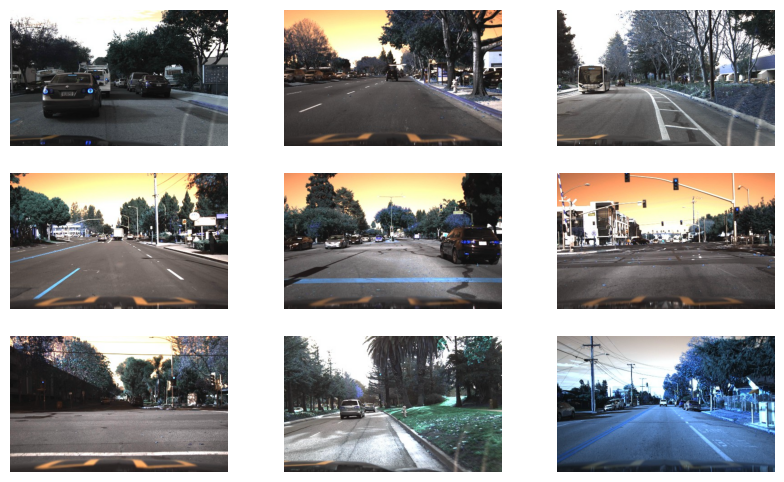

In [62]:
# Define the path to the dataset images
root_path = '/kaggle/input/self-driving-cars/images/*'

# Set the number of random samples to display
samples = 9

# Get all image file paths from the dataset
img_data = glob(root_path)

# Select 9 random images from the dataset
random_img = random.sample(img_data, samples)

# Create a 3x3 grid to display the images
plt.figure(figsize=(10,6))

for i in range(samples):
    plt.subplot(3,3,i+1)  # Create a subplot for each image
    plt.imshow(cv2.imread(random_img[i]))  # Read and display the image
    plt.axis('off')  # Hide axis for better visualization


# YOLO Object Detection on Random Images

## 🔹Initialize an Empty List
- `images = []` stores the processed images.

## 🔹Loop Through Random Images
- `for i in range(samples):` processes each selected image.

## 🔹Run YOLO Detection
- `yolo_model.predict(random_img[i])` runs object detection on the image.
- `output.boxes` contains detected bounding boxes.
- `output.names` stores class labels.

## 🔹Extract Object Details
- **Label** → `names[box.cls[j].item()]`
- **Bounding Box Coordinates** → `box.xyxy[j].tolist()`
- **Confidence Score** → `np.round(box.conf[j].item(), 2)`

## 🔹Store Processed Images
- `images.append(output.plot()[:, :, ::-1])` saves the image with detections.


In [63]:
# Create an empty list to store processed images
images = []

# Loop through the selected images
for i in range(samples):
    # Run YOLO object detection on the image
    yolo_outputs = yolo_model.predict(random_img[i])
    output = yolo_outputs[0]  # Get the first result

    # Extract detected objects' bounding boxes and class names
    box = output.boxes
    names = output.names

    # Store the processed image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



image 1/1 /kaggle/input/self-driving-cars/images/1478897384825629034.jpg: 416x640 7 cars, 1 bus, 2 trucks, 574.6ms
Speed: 2.5ms preprocess, 574.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/self-driving-cars/images/1479502873271949413.jpg: 416x640 13 cars, 1 fire hydrant, 582.8ms
Speed: 2.2ms preprocess, 582.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/self-driving-cars/images/1478898230334350916.jpg: 416x640 2 persons, 3 cars, 1 bus, 596.4ms
Speed: 2.2ms preprocess, 596.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/self-driving-cars/images/1479499708554918278.jpg: 416x640 5 cars, 1 truck, 580.9ms
Speed: 2.3ms preprocess, 580.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/self-driving-cars/images/1479505420943078584.jpg: 416x640 9 cars, 2 traffic lights, 570.0ms
Speed: 2.1ms preprocess, 570.0ms i

# Display YOLO Detection Results

## 🔹Loop Through Detected Images
- `enumerate(images)` loops through the list of detected images.
- `plt.subplot(3,3,i+1)` arranges images in a **3x3 grid**.

## 🔹Display Images
- `plt.imshow(img)` shows each image.
- `plt.axis('off')` removes axis labels for a cleaner view.

## 🔹Adjust Layout & Show Images
- `plt.tight_layout()` prevents overlapping.
- `plt.show()` displays all images.


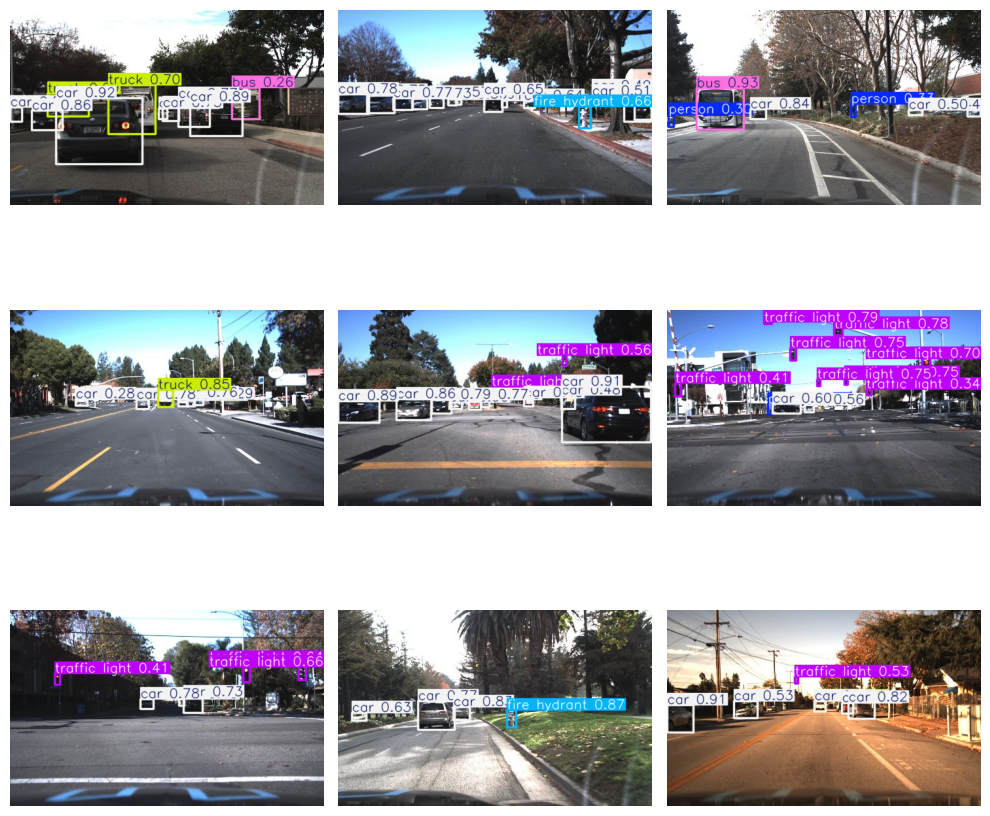

In [64]:
# Set the figure size for displaying images
plt.figure(figsize=(10,10))

# Loop through the processed images and display them
for i, img in enumerate(images):
    plt.subplot(3,3,i+1)  # Create a 3x3 grid for images
    plt.imshow(img)  # Show the image with YOLO detections
    plt.axis('off')  # Hide axis for better visualization

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the images
plt.show()


# Object Detection Function with YOLO

## 🔹Perform Object Detection
- `yolo_model.predict(image)` runs YOLO detection on the input image.
- `output.plot()` generates the output image with bounding boxes.

## 🔹Create a Figure for Visualization
- `plt.figure(figsize=(10,5))` sets the figure size.

## 🔹Display the Original Image
- `cv2.imread(image, cv2.IMREAD_COLOR)` reads the image.
- `cv2.cvtColor(..., cv2.COLOR_BGR2RGB)` converts it from BGR to RGB.
- `plt.subplot(1,2,1)` places it on the left.

## 🔹Display the Object-Detected Image
- `plt.subplot(1,2,2)` places the processed image on the right.
- `plt.imshow(NewImage)` displays the image with detections.

In [66]:
def ODImage(image):
    # Run YOLO object detection on the input image
    yolo_outputs = yolo_model.predict(image)
    output = yolo_outputs[0]  # Get the first result

    # Extract detected bounding boxes and class names
    box = output.boxes
    names = output.names

    # Generate the output image with detected objects
    NewImage = output.plot()[:, :, ::-1]

    # Create a figure for displaying original and detected images
    plt.figure(figsize=(10,5))

    # Display the original image
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(cv2.imread(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display the image with YOLO detections
    plt.subplot(1,2,2)
    plt.imshow(NewImage)
    plt.title('OD Image')
    plt.axis('off')

    # Show the images
    plt.show()



image 1/1 /kaggle/input/self-driving-cars/images/1479499631049534600.jpg: 416x640 3 cars, 3 traffic lights, 587.2ms
Speed: 2.5ms preprocess, 587.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


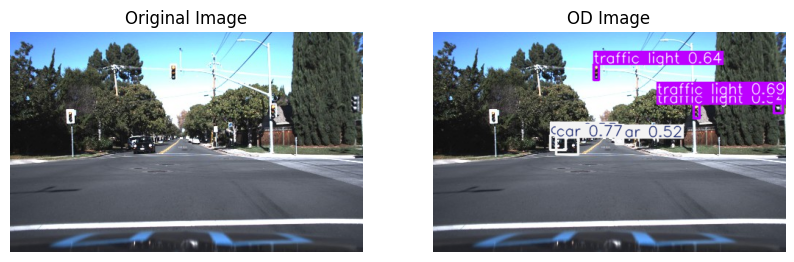


image 1/1 /kaggle/input/self-driving-cars/images/1478732495865983003.jpg: 416x640 3 cars, 3 traffic lights, 569.9ms
Speed: 3.0ms preprocess, 569.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


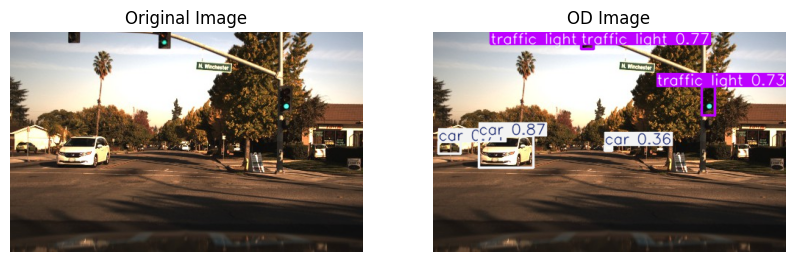

In [67]:
#Input the image path Original vs od image
ODImage('/kaggle/input/self-driving-cars/images/1479499631049534600.jpg')
ODImage('/kaggle/input/self-driving-cars/images/1478732495865983003.jpg')


image 1/1 /kaggle/input/self-driving-cars/images/1478898916453736706.jpg: 416x640 1 person, 2 cars, 5 traffic lights, 569.6ms
Speed: 2.2ms preprocess, 569.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


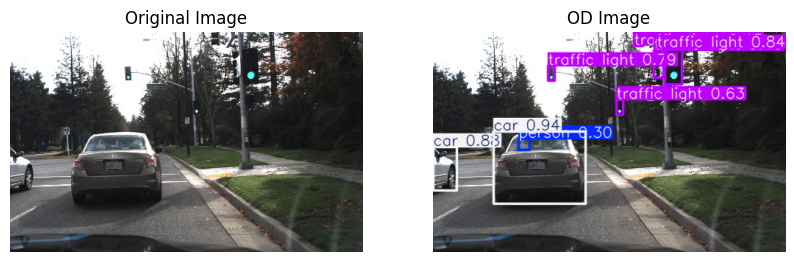

In [75]:
#Randomly select the path
Path = '/kaggle/input/self-driving-cars/images'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))

# Accuracy

## Compute Accuracy (mAP)
- `yolo_model.val()` evaluates the model.
- `mAP@0.5` → General detection accuracy.
- `mAP@0.5:0.95` → Stricter accuracy across IoU thresholds.

## Display Results
- The **original image** is shown on the left.
- The **detection image with accuracy** is shown on the right.

## Print Accuracy
- `print(f"mAP@0.5: {mAP_50:.4f}")` displays accuracy in the console.


In [76]:
#Calculate accuracy (mAP) by validating YOLO on the image
results = yolo_model.val()
mAP_50 = results.box.map50  # Mean Average Precision at IoU 0.5
mAP_50_95 = results.box.map  # Mean Average Precision at IoU 0.5:0.95

# Print accuracy results
print(f"mAP@0.5: {mAP_50:.4f}")
print(f"mAP@0.5:0.95: {mAP_50_95:.4f}")


Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /kaggle/working/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [1:05:48<00:00, 12.61s/it]


                   all       5000      36335      0.716       0.61      0.668      0.503
                person       2693      10777      0.821      0.745      0.829      0.618
               bicycle        149        314      0.742      0.525      0.627      0.403
                   car        535       1918      0.766      0.638      0.714        0.5
            motorcycle        159        367      0.811       0.68      0.793      0.548
              airplane         97        143       0.84      0.884      0.925      0.781
                   bus        189        283       0.85      0.784      0.864      0.751
                 train        157        190       0.88      0.888      0.938      0.769
                 truck        250        414      0.656       0.51      0.605      0.444
                  boat        121        424      0.731      0.469      0.574      0.335
         traffic light        191        634      0.723      0.483      0.568      0.321
          fire hydran